# Initializtion


Connect to Google Drive:

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [3]:
X_train = X_train_bow
X_test = X_test_bow

# Basic training

We define and train a model with default hyperparameter, which is alpha = 1:

In [4]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Evaluate model using preset function:

Score of on train are:
	- Accuracy score: 0.94
	- Micro F1 score: 0.94
	- Macro F1 score: 0.90
Score of on test are:
	- Accuracy score: 0.81
	- Micro F1 score: 0.81
	- Macro F1 score: 0.70


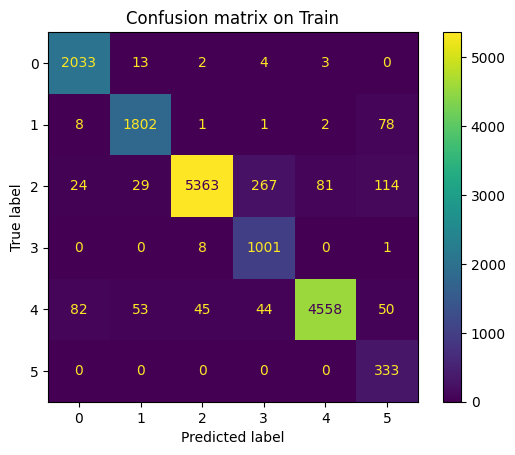

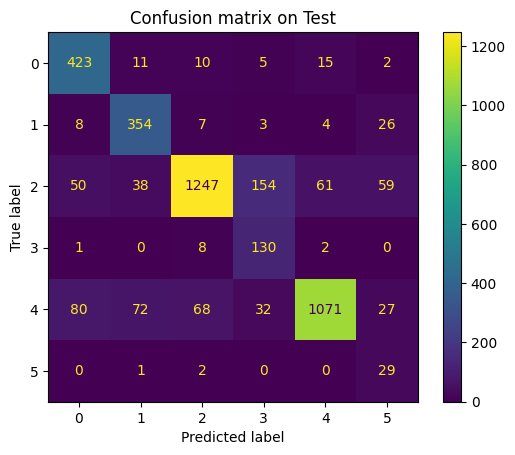

In [5]:
evaluate_model(nb_model, X_train, X_test, y_train, y_test, include_training=True)

Draw the learning curve using preset function:

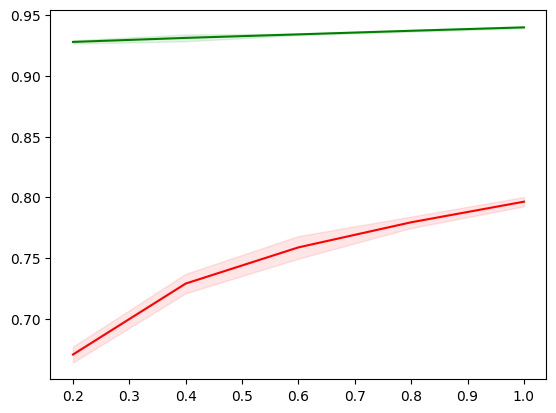

In [6]:
draw_learning_curve(nb_model, X_train, y_train)

# Model selection

## $\alpha$ parameter

First we try a hyperparameter range:

In [7]:
# Setting the hyperparameter range
K = [0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10]

In [8]:
# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for k in K:
  # Define model for each K
  nb_model = MultinomialNB(alpha=k)
  nb_model.fit(X_train, y_train)

  # Calculate score of cross validation
  train_score = accuracy_score(y_train, nb_model.predict(X_train))
  cv_score = np.mean(cross_val_score(nb_model, X_train, y_train, cv=5, n_jobs=8))

  trs_list.append(train_score)
  cvs_list.append(cv_score)

[0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10]
[0.9848125, 0.9846875, 0.9846875, 0.985625, 0.984875, 0.943125, 0.733125]
[0.712625, 0.710875, 0.710875, 0.7066250000000001, 0.7719999999999999, 0.7964375, 0.6608124999999999]


[Text(0, 0, '0.0001'),
 Text(1, 0, '0.001'),
 Text(2, 0, '0.001'),
 Text(3, 0, '0.01'),
 Text(4, 0, '0.1'),
 Text(5, 0, '1'),
 Text(6, 0, '10')]

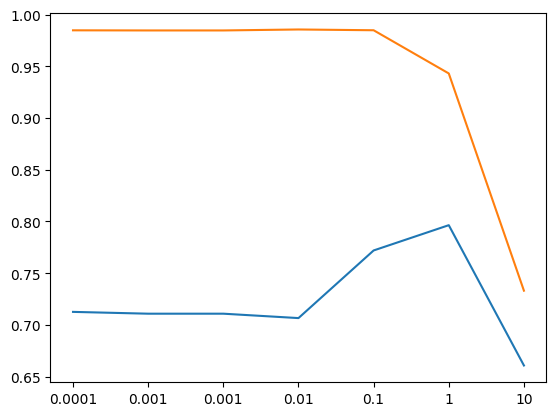

In [9]:
# Print the result
print(K)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(K))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(K))), y=trs_list)
fig.set_xticks(range(len(K)))
fig.set_xticklabels(K)

From the result of above section, we can see the good value of $\alpha$ is near the value 1.

Scope to $\alpha = 1$:

In [10]:
# Setting the hyperparameter range
K = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75 ]

In [11]:
# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for k in K:
  # Define model for each K
  nb_model = MultinomialNB(alpha=k)
  nb_model.fit(X_train, y_train)

  # Calculate score of cross validation
  train_score = accuracy_score(y_train, nb_model.predict(X_train))
  cv_score = np.mean(cross_val_score(nb_model, X_train, y_train, cv=5, n_jobs=8))

  trs_list.append(train_score)
  cvs_list.append(cv_score)

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75]
[0.98025, 0.969875, 0.9579375, 0.943125, 0.9275625, 0.91425, 0.901875]
[0.81775, 0.82225, 0.8095625, 0.7964375, 0.78425, 0.7744375, 0.76475]


[Text(0, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(2, 0, '0.75'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75')]

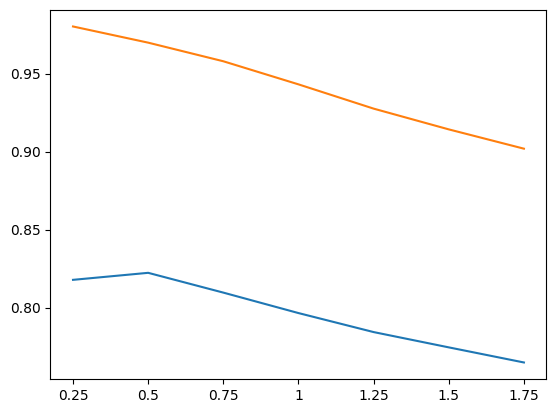

In [12]:
# Print the result
print(K)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(K))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(K))), y=trs_list)
fig.set_xticks(range(len(K)))
fig.set_xticklabels(K)

As the result, we can claim that $\alpha = 0.5$ give a model with good accuracy and avoid overfitting. We will test the model again in test set.

In [13]:
best_nb_model = MultinomialNB(alpha=0.5)

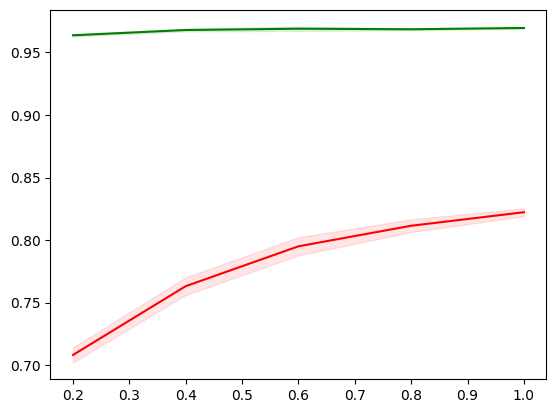

In [14]:
draw_learning_curve(best_nb_model, X_train, y_train)

Score of on train are:
	- Accuracy score: 0.97
	- Micro F1 score: 0.97
	- Macro F1 score: 0.95
Score of on test are:
	- Accuracy score: 0.83
	- Micro F1 score: 0.83
	- Macro F1 score: 0.76


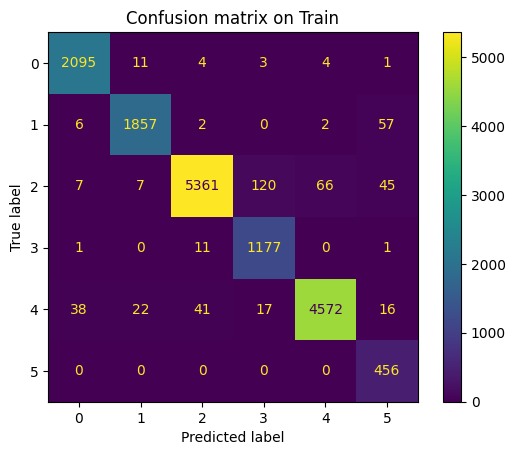

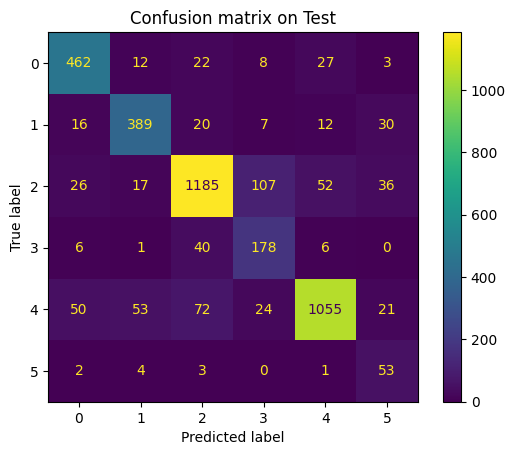

In [15]:
best_nb_model.fit(X_train, y_train)
evaluate_model(best_nb_model, X_train, X_test, y_train, y_test, include_training=True)

# Export model

In [16]:
directory = "data/models/nb/"

dump(best_nb_model, directory + "best_nb_bow_model.joblib")

['data/models/nb/best_nb_bow_model.joblib']